In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
df_edge=pd.read_csv('/content/drive/MyDrive/reddit_immigration_comments_uk_edge.csv')
df_node=pd.read_csv('/content/drive/MyDrive/reddit_immigration_uk_node.csv')

In [ ]:
df_edge

,Source,Target,Type
0,1c4970a,kzm47g4,If you can't convince him that he shouldn't as...
1,1c4970a,kzm4mlc,It's tough. My brother was giving away his cre...
2,1c4970a,kzm4ssi,My Grandma was facing similar issues recently....
3,1c4970a,kzm47g4,If you can't convince him that he shouldn't as...
4,1c4970a,kzm4mlc,It's tough. My brother was giving away his cre...
...,...,...,...
36064,1c45kyd,kzlizuh,Oh ok . Take care of your health though . I al...
36065,1c45kyd,kzljky8,Lucky you had a choice. I do a support job so ...
36066,1c45kyd,kzlk03d,Koi na bro everything will work out
36067,1c45kyd,kzlkina,Hopefully


In [ ]:
df_node

,Id,Label,Role
0,1c49chg,1c49chg,Initiator
1,1c49chg,1c49chg,Initiator
2,1c49ce8,1c49ce8,Initiator
3,1c49chg,1c49chg,Initiator
4,1c49ce8,1c49ce8,Initiator
...,...,...,...
53830,kzlk03d,kzlk03d,Commentor
53831,kzlkina,kzlkina,Commentor
53832,1c45kmh,1c45kmh,Initiator
53833,kzlfe01,kzlfe01,Commentor


In [ ]:
df_node_processed=df_node.copy(deep=True)

In [ ]:
df_node_processed.drop_duplicates(inplace=True)

In [ ]:
df_node_processed.loc[:,'Id'].nunique()

616

In [ ]:
df_node_processed.head()

,Id,Label,Role
0,1c49chg,1c49chg,Initiator
2,1c49ce8,1c49ce8,Initiator
5,1c4999a,1c4999a,Initiator
9,1c497ri,1c497ri,Initiator
14,1c4970a,1c4970a,Initiator


In [ ]:
df_node_processed.loc[:,"Role"].value_counts()

Role
Commentor    428
Initiator    188
Name: count, dtype: int64

In [ ]:
df_edge_processed=df_edge.copy(deep=True)

In [ ]:
df_edge_processed.drop_duplicates(inplace=True)

In [ ]:
df_edge_processed.reset_index(drop=True,inplace=True)

In [ ]:
df_edge_processed

,Source,Target,Type
0,1c4970a,kzm47g4,If you can't convince him that he shouldn't as...
1,1c4970a,kzm4mlc,It's tough. My brother was giving away his cre...
2,1c4970a,kzm4ssi,My Grandma was facing similar issues recently....
3,1c495qm,kzm38vk,"**Due to the increase in Palestine content, we..."
4,1c48wqr,kzm3w77,Look at companies that are hiring and look at ...
...,...,...,...
423,1c45kyd,kzlizuh,Oh ok . Take care of your health though . I al...
424,1c45kyd,kzljky8,Lucky you had a choice. I do a support job so ...
425,1c45kyd,kzlk03d,Koi na bro everything will work out
426,1c45kyd,kzlkina,Hopefully


In [ ]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

stop_words = []

with open('/content/drive/MyDrive/Social Media Files/SmartStoplist.txt', "r") as f:
    for line in f:
        stop_words.extend(line.split())

stop_words = stop_words

def pre_processor_lem(text):
    # Removing emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove newline characters
    text = text.replace('\n', ' ')

    # Remove URLs
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Removing non-alphanumeric characters and extra whitespaces for people commenting in diffrernt langauges
    # The logic is if it's in ASCII then dont remove it otherwise remove
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove non-ASCII
    text = ''.join(character for character in text if unicodedata.category(character)[0] == 'L' or character == ' ')

    # Remove multiple whitespaces and strip leading/trailing whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    #regular expression keeping only letters
    letters_only_text = re.sub("[^a-zA-Z]", " ", text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = WordNetLemmatizer() #plug in here any other stemmer or lemmatiser you want to try out

    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)

    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.lemmatize(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)

    # converting list back to string
    return " ".join(stemmed_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_edge_processed['Type2Lem']=df_edge_processed['Type'].apply(pre_processor_lem)

In [ ]:
df_edge_processed

,Source,Target,Type,Type2Lem
0,1c4970a,kzm47g4,If you can't convince him that he shouldn't as...,convince assume unrequested financial opportun...
1,1c4970a,kzm4mlc,It's tough. My brother was giving away his cre...,tough brother giving credit card info phone st...
2,1c4970a,kzm4ssi,My Grandma was facing similar issues recently....,grandma facing similar issue recently installe...
3,1c495qm,kzm38vk,"**Due to the increase in Palestine content, we...",increase palestine content like remind people ...
4,1c48wqr,kzm3w77,Look at companies that are hiring and look at ...,company hiring job description adjust resume r...
...,...,...,...,...
423,1c45kyd,kzlizuh,Oh ok . Take care of your health though . I al...,care health chance night shift current job hea...
424,1c45kyd,kzljky8,Lucky you had a choice. I do a support job so ...,lucky choice support job shift changing yeah a...
425,1c45kyd,kzlk03d,Koi na bro everything will work out,koi na bro work
426,1c45kyd,kzlkina,Hopefully,


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

#opting for lamentizer instead of stemmer
data = df_edge_processed.Type2Lem.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['convince', 'assume', 'unrequested', 'financial', 'opportunity', 'approach', 'lot', 'scepticism', 'discussion', 'setting', 'finance', 'engage', 'made', 'big', 'decision', 'like', 'invest', 'thing', 'stop', 'minimise', 'opportunity', 'harm', 'thing']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
dictionary = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1)]


In [ ]:
from pprint import pprint
from gensim.models import LdaMulticore
# number of topics
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=20))
doc_lda = lda_model[corpus]

[(0,
  '0.008*"question" + 0.008*"moderator" + 0.006*"contact" + 0.006*"action" + '
  '0.006*"post" + 0.005*"milk" + 0.005*"information" + 0.005*"automatically" + '
  '0.005*"concern" + 0.005*"performed" + 0.005*"bot" + 0.004*"report" + '
  '0.004*"like" + 0.004*"people" + 0.004*"comment" + 0.004*"user" + '
  '0.004*"good" + 0.003*"machine" + 0.003*"subreddit" + 0.003*"short"'),
 (1,
  '0.009*"people" + 0.007*"like" + 0.006*"country" + 0.006*"vapes" + '
  '0.005*"uk" + 0.004*"lot" + 0.004*"selling" + 0.004*"nicotine" + '
  '0.004*"thing" + 0.003*"time" + 0.003*"work" + 0.003*"good" + 0.003*"veil" + '
  '0.003*"pretty" + 0.003*"version" + 0.003*"agent" + 0.003*"group" + '
  '0.003*"view" + 0.003*"play" + 0.002*"question"'),
 (2,
  '0.009*"milk" + 0.007*"medium" + 0.007*"social" + 0.006*"like" + '
  '0.005*"people" + 0.005*"country" + 0.004*"photo" + 0.004*"good" + '
  '0.004*"moderator" + 0.004*"yeah" + 0.004*"work" + 0.004*"time" + '
  '0.003*"account" + 0.003*"contact" + 0.003*"action

In [ ]:
# using u_mass here to account for coherence within model rather than external, a negative score indicates better coherance and even better topics
from gensim.models.coherencemodel import CoherenceModel
# Calculate Model Coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)

Coherence Score:  -7.6074502519951075


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Social Media Files/ldavis_prepared_graph_edge_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Social Media Files/ldavis_prepared__edge_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.042775 -0.053186       1        1  23.588614
5      0.020389  0.061630       2        1  17.932205
3     -0.063417  0.046826       3        1  17.322607
0     -0.027409 -0.013362       4        1  15.726465
1      0.088244  0.001866       5        1  13.087310
2      0.024968 -0.043773       6        1  12.342800, topic_info=               Term       Freq      Total Category  logprob  loglift
518            milk  95.000000  95.000000  Default  30.0000  30.0000
1637         medium  11.000000  11.000000  Default  29.0000  29.0000
1618         social  14.000000  14.000000  Default  28.0000  28.0000
3027          vapes   9.000000   9.000000  Default  27.0000  27.0000
355          reddit  18.000000  18.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
78    automatically   3.244358  32.684145   Topic6  -5.8086  -0.2179
261              uk   3.240901  38.784943   Topic6  -5.8097  -0.3901
79              bot   3.119608  31.221002   Topic6  -5.8478  -0.2113
364            user   3.029933  35.961472   Topic6  -5.8770  -0.3818
103        question   2.953711  43.444960   Topic6  -5.9024  -0.5963

[439 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
381       1  0.207734  account
381       4  0.311601  account
381       6  0.415468  account
75        1  0.200954   action
75        2  0.143539   action
...     ...       ...      ...
397       3  0.178416     year
397       4  0.089208     year
397       5  0.044604     year
397       6  0.089208     year
1148      6  0.762883     york

[826 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 1, 2, 3])

In [ ]:
texts=df_edge_processed.Type2Lem.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['convince assume unrequested financial opportunity approach lot scepticism discussion setting finance engage made big decision like invest thing stop minimise opportunity harm thing',
 'tough brother giving credit card info phone stage wife telling scam carried scammed fb marketplace suspicion keyed realme detail fake webpage potty bit impulsive personally fbook cellphone poor mix seated desktop time responding beep pocket lot quicker thought',
 'grandma facing similar issue recently installed spark call screen phone house family member monitoring email regularly helped lot',
 'increase palestine content like remind people mark post nsfwspoiler post posting applicable content labouring class country rising rise click info join union check iww renter union acorn international affiliate join partner discord server follow twitter bot action performed automatically contact moderator subredditmessagecomposetorgreenandpleasant question concern',
 'company hiring job description adjust resum

In [ ]:
pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


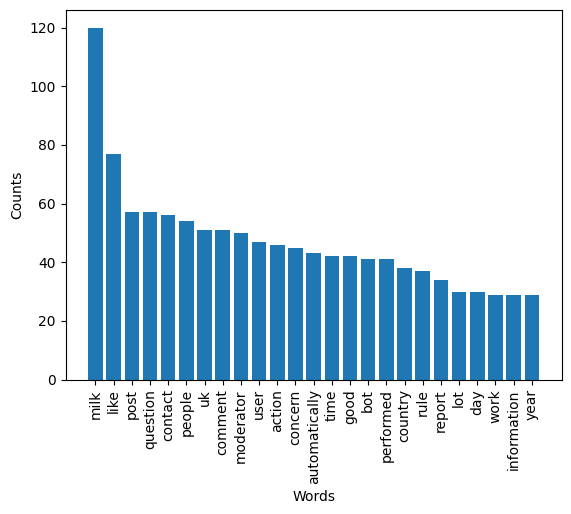

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

words = [word for line in df_edge_processed.loc[:,'Type2Lem'] for word in line.split()]
word_counts = Counter(words)

most_common_words = word_counts.most_common(25)
words, counts = zip(*most_common_words)

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity/(1 if len(text)==0 else len(text))
def get_sentiment_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity/(1 if len(text)==0 else len(text))

df_edge_processed["Sentiment"] = df_edge_processed['Type2Lem'].apply(get_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_edge_processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Source,Target,Type,Type2Lem,Sentiment
0,1c4970a,kzm47g4,If you can't convince him that he shouldn't as...,convince assume unrequested financial opportun...,neutral
1,1c4970a,kzm4mlc,It's tough. My brother was giving away his cre...,tough brother giving credit card info phone st...,negative
2,1c4970a,kzm4ssi,My Grandma was facing similar issues recently....,grandma facing similar issue recently installe...,neutral
3,1c495qm,kzm38vk,"**Due to the increase in Palestine content, we...",increase palestine content like remind people ...,positive
4,1c48wqr,kzm3w77,Look at companies that are hiring and look at ...,company hiring job description adjust resume r...,positive
...,...,...,...,...,...
423,1c45kyd,kzlizuh,Oh ok . Take care of your health though . I al...,care health chance night shift current job hea...,negative
424,1c45kyd,kzljky8,Lucky you had a choice. I do a support job so ...,lucky choice support job shift changing yeah a...,positive
425,1c45kyd,kzlk03d,Koi na bro everything will work out,koi na bro work,neutral
426,1c45kyd,kzlkina,Hopefully,,neutral


In [ ]:
edge_network=df_edge_processed.copy(deep=True)
edge_network=edge_network.loc[:,['Source','Target','Sentiment']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(edge_network)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


428

In [ ]:
edge_network.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(edge_network)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


428

In [ ]:
edge_network

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Source,Target,Sentiment
0,1c4970a,kzm47g4,neutral
1,1c4970a,kzm4mlc,negative
2,1c4970a,kzm4ssi,neutral
3,1c495qm,kzm38vk,positive
4,1c48wqr,kzm3w77,positive
...,...,...,...
423,1c45kyd,kzlizuh,negative
424,1c45kyd,kzljky8,positive
425,1c45kyd,kzlk03d,neutral
426,1c45kyd,kzlkina,neutral


In [ ]:
df_node_processed.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_node_processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,Label,Role
0,1c49chg,1c49chg,Initiator
1,1c49ce8,1c49ce8,Initiator
2,1c4999a,1c4999a,Initiator
3,1c497ri,1c497ri,Initiator
4,1c4970a,1c4970a,Initiator
...,...,...,...
611,kzlk03d,kzlk03d,Commentor
612,kzlkina,kzlkina,Commentor
613,1c45kmh,1c45kmh,Initiator
614,kzlfe01,kzlfe01,Commentor


In [ ]:
df_node_processed_v2=df_node_processed.copy(deep=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edge_network_v2=edge_network.copy(deep=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(df_node_processed_v2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


616

In [ ]:
def check_values(list1, list2, target_list):
    missing=list()
    for value1 in (list1+list2):
      if value1 in target_list:
          print(f"{value1} from list1 present in the target list.")
      else:
          print(f"not present in the target list.")
          missing.append('value')
    return missing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
missing=check_values(edge_network_v2['Source'].tolist(),edge_network['Target'].tolist(),df_node_processed_v2['Id'].tolist())

1c4970a from list1 present in the target list.
1c4970a from list1 present in the target list.
1c4970a from list1 present in the target list.
1c495qm from list1 present in the target list.
1c48wqr from list1 present in the target list.
1c48wny from list1 present in the target list.
1c48wny from list1 present in the target list.
1c48w85 from list1 present in the target list.
1c48vnt from list1 present in the target list.
1c48tmv from list1 present in the target list.
1c48rsg from list1 present in the target list.
1c48q1o from list1 present in the target list.
1c48q1o from list1 present in the target list.
1c48q1o from list1 present in the target list.
1c48q1o from list1 present in the target list.
1c48nk9 from list1 present in the target list.
1c48m5x from list1 present in the target list.
1c48m5x from list1 present in the target list.
1c48la5 from list1 present in the target list.
1c48la5 from list1 present in the target list.
1c48k8q from list1 present in the target list.
1c48k8q from 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
missing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [ ]:
df_node_processed.to_csv("/content/drive/MyDrive/Social Media Files/reddit_immigration_node.csv")
edge_network.to_csv("/content/drive/MyDrive/Social Media Files/reddit_immigration_edge.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
